In [200]:
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.ticker as plticker

<h4>With scipy.stats.pdf function</h4>

In [201]:
mean = 15
std = 1

x = np.linspace(10, 20, 200)
y = stats.norm.pdf(x, mean, std)

df = pd.DataFrame(columns=["x", "y"])
df["x"] = x
df["y"] = y

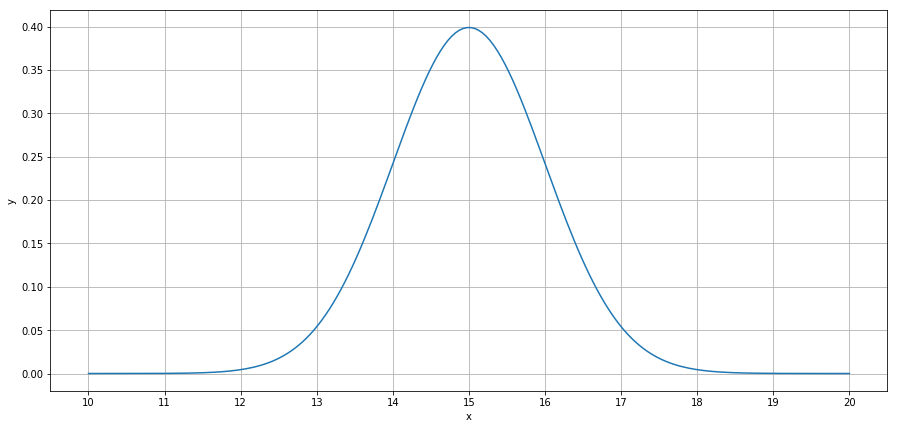

In [202]:

plt.figure(figsize=(15, 7))

plot_1 = sns.lineplot('x', 'y', data=df)
plot_1_ticker = plticker.MultipleLocator(base=1.0)
plot_1.xaxis.set_major_locator(plot_1_ticker)

plt.grid()

<h4>Own calculations</h4>

In [203]:
# height
from random import randint
from math import pi as PI
from math import exp

short = list(map(lambda x: randint(15000, 16000) / 100, [1] * 75))
medium = list(map(lambda x: randint(16000, 17400) / 100, [1] * 200))
high = list(map(lambda x: randint(17400, 19500) / 100, [1] * 75))
x = short + medium + high
x = sorted(x)

n = len(x)
mean = sum(x)/n
variance = sum(list(map(lambda a: (a - mean)**2, x))) / (n - 1)
std = variance ** (1/2)

def pdf(x, mean, var):
    a = 1./((2*PI*var)**(1/2))
    b = exp(-((x-mean)**2/(2*var)))
    return a * b

df2 = pd.DataFrame(columns=["x", "y"])

x_min, x_max = min(x), max(x)
x = np.linspace(x_min-(1/10)*x_max, x_max+(1/10)*x_max, 500)

y = list(map(lambda a: pdf(a, mean, variance), x))

df2["x"] = x
df2["y"] = y

mean     : 168.4763714285714
variance : 131.64636014817836
std      : 11.473724772199233


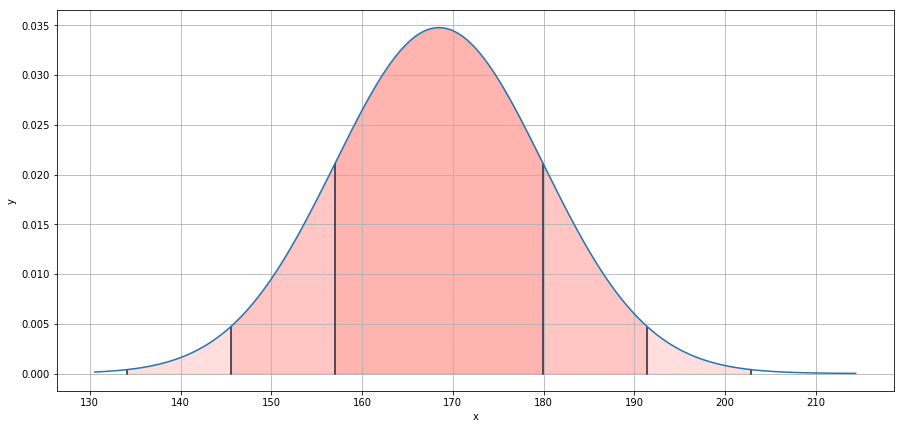

In [204]:

plt.figure(figsize=(15, 7))

fill_points = 50
fill_color = '#FF7F78'

# 1 x std
pt1 = mean + std
plt.plot([pt1, pt1],[0.0, pdf(pt1, mean, variance)], color='#212440')

pt2 = mean - std
plt.plot([pt2 ,pt2],[0.0, pdf(pt2, mean, variance)], color='#212440')

# fill beetween
ptx = np.linspace(pt1, pt2, fill_points)
pty = list(map(lambda a: pdf(a, mean, variance), ptx))
plt.fill_between(ptx, pty, color=fill_color, alpha='0.25')

# 2 x std
pt1 = mean + std * 2
plt.plot([pt1, pt1],[0.0, pdf(pt1, mean, variance)], color='#212440')

pt2 = mean - std * 2
plt.plot([pt2 ,pt2],[0.0, pdf(pt2, mean, variance)], color='#212440')

# fill beetween
ptx = np.linspace(pt1, pt2, fill_points)
pty = list(map(lambda a: pdf(a, mean, variance), ptx))
plt.fill_between(ptx, pty, color=fill_color, alpha='0.25')

# 2 x std
pt1 = mean + std * 3
plt.plot([pt1, pt1],[0.0, pdf(pt1, mean, variance)], color='#212440')

pt2 = mean - std * 3
plt.plot([pt2 ,pt2],[0.0, pdf(pt2, mean, variance)], color='#212440')

# fill beetween
ptx = np.linspace(pt1, pt2, fill_points)
pty = list(map(lambda a: pdf(a, mean, variance), ptx))
plt.fill_between(ptx, pty, color=fill_color, alpha='0.25')


plot_2 = sns.lineplot('x', 'y', data=df2)
plot_2_ticker = plticker.MultipleLocator(base=10.0)
plot_2.xaxis.set_major_locator(plot_2_ticker)

plt.grid()

print("mean     :", mean)
print("variance :", variance)
print("std      :", std)